In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset
path = r"C:\Users\Olegi Megi\Desktop\Dataanalytics\Projects\Python Projects\Machine Learning\Datascience Salary\ds_salaries.csv"
ds_salary = pd.read_csv(path)

## Get a overview of the Data

In [3]:
ds_salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
ds_salary.shape

(3755, 11)

In [5]:
ds_salary.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
columns = ds_salary.columns
ds_salary[columns].nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [7]:
ds_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [8]:
ds_salary.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


## Clean Data

In [9]:
# check for missing values
ds_salary.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
# check for duplicates
ds_salary.duplicated().sum()

1171

In [11]:
ds_salary = ds_salary.drop_duplicates(keep="first")
ds_salary.shape

(2584, 11)

### Work Year

Text(-0.5, 1250, 'This refers to the year in which the salary was paid.')

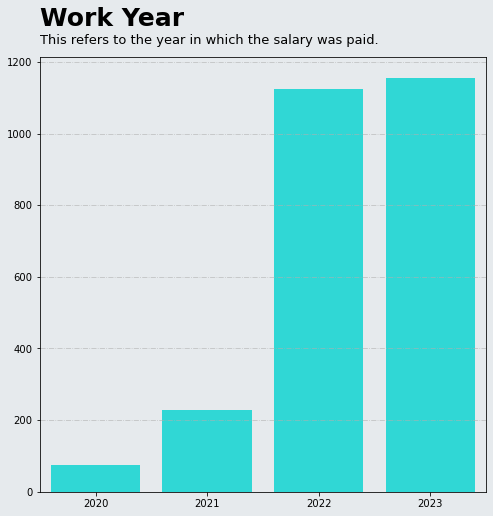

In [12]:
# this is going to be the facecolor
background = "#E6EAED"

# make the figure
fig, ax = plt.subplots(1,1, figsize=(8,8), facecolor=background)
ax.set_facecolor(background)

# make the plot
sns.countplot(x=ds_salary.work_year, color="#14F3F0")

# add annotations

# add grid
ax.grid(axis="y", linestyle="-.", alpha=0.7)

# customize the visualization
plt.xlabel("")
plt.ylabel("")

# Simple way of adding a title 
#plt.title("Work Year", loc="left", size=25)

# another way to add a title
ax.text(-0.5, 1300, "Work Year", size=25, weight="bold") # title
ax.text(-0.5, 1250, "This refers to the year in which the salary was paid.", size=13) # suptitle 

### Experience Level 

Text(-0.5, 1610, '\nWe can see that the vast majority of employees are in \na Senior position, while only a minority is in a Executive position\n')

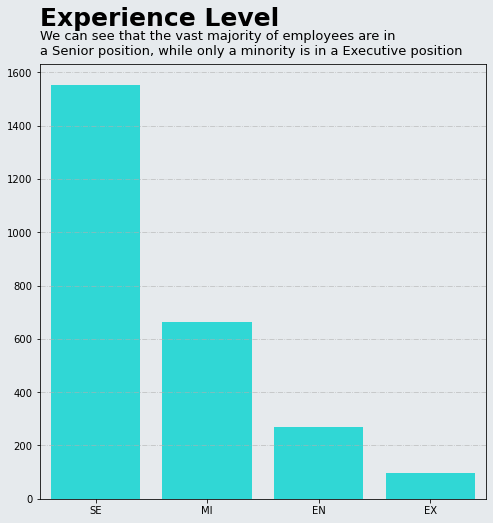

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8,8), facecolor=background)
ax.set_facecolor(background)

sns.countplot(x=ds_salary.experience_level, color="#14F3F0")

plt.grid(axis="y", linestyle="-.", alpha=0.7)

plt.xlabel("")
plt.ylabel("")
 
ax.text(-0.5, 1775, "Experience Level", size="25", weight="bold")
ax.text(-0.5, 1610, """
We can see that the vast majority of employees are in 
a Senior position, while only a minority is in a Executive position
""", size=13)

### Employment type 

<AxesSubplot:xlabel='employment_type', ylabel='count'>

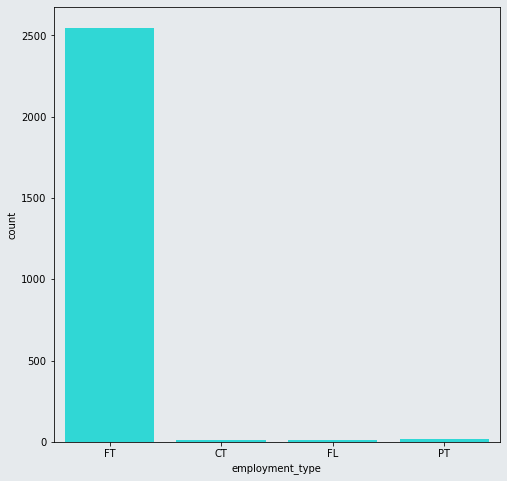

In [14]:
fig, ax = plt.subplots(1,1, figsize=(8,8), facecolor=background)
ax.set_facecolor(background)

sns.countplot(x=ds_salary.employment_type, color="#14F3F0")

### Jobtitle 

In [15]:
top10_jobs = ds_salary.job_title.value_counts().iloc[:10]
print(top10_jobs)

Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
Research Scientist            65
Data Architect                64
Data Science Manager          52
ML Engineer                   34
Research Engineer             33
Name: job_title, dtype: int64


Text(0.0, -0.75, '\nIt is a nostalgic sentiment to consider that the three prevailing occupations are those of a \nData Engineer, Data Scientist, and Data Analyst.')

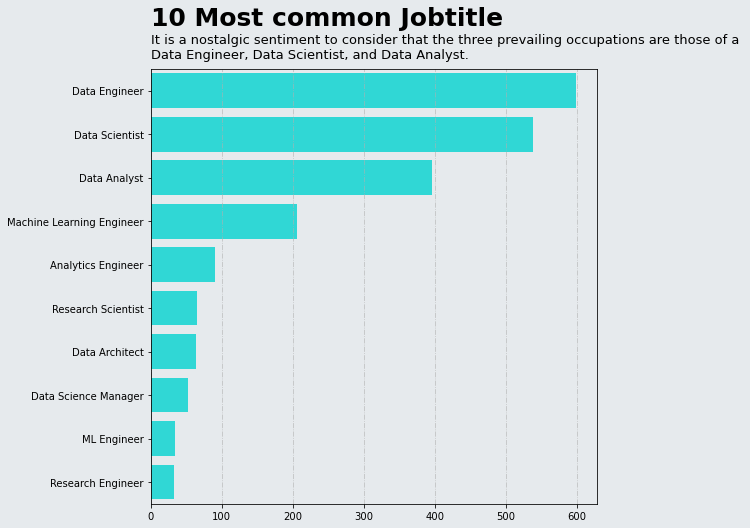

In [16]:
fig, ax = plt.subplots(1,1, figsize=(8,8), facecolor=background)
ax.set_facecolor(background)

sns.barplot(x=top10_jobs.values, y=top10_jobs.index, color="#14F3F0", orient="h")

plt.grid(axis="x", linestyle="-.", alpha=0.7)

plt.text(0, -1.5, "10 Most common Jobtitle", size=25, weight="bold")
plt.text(0., -0.75, """
It is a nostalgic sentiment to consider that the three prevailing occupations are those of a 
Data Engineer, Data Scientist, and Data Analyst.""", size=13)


In [17]:
# create a wordcloud as an alternative visualization 

### Salary 

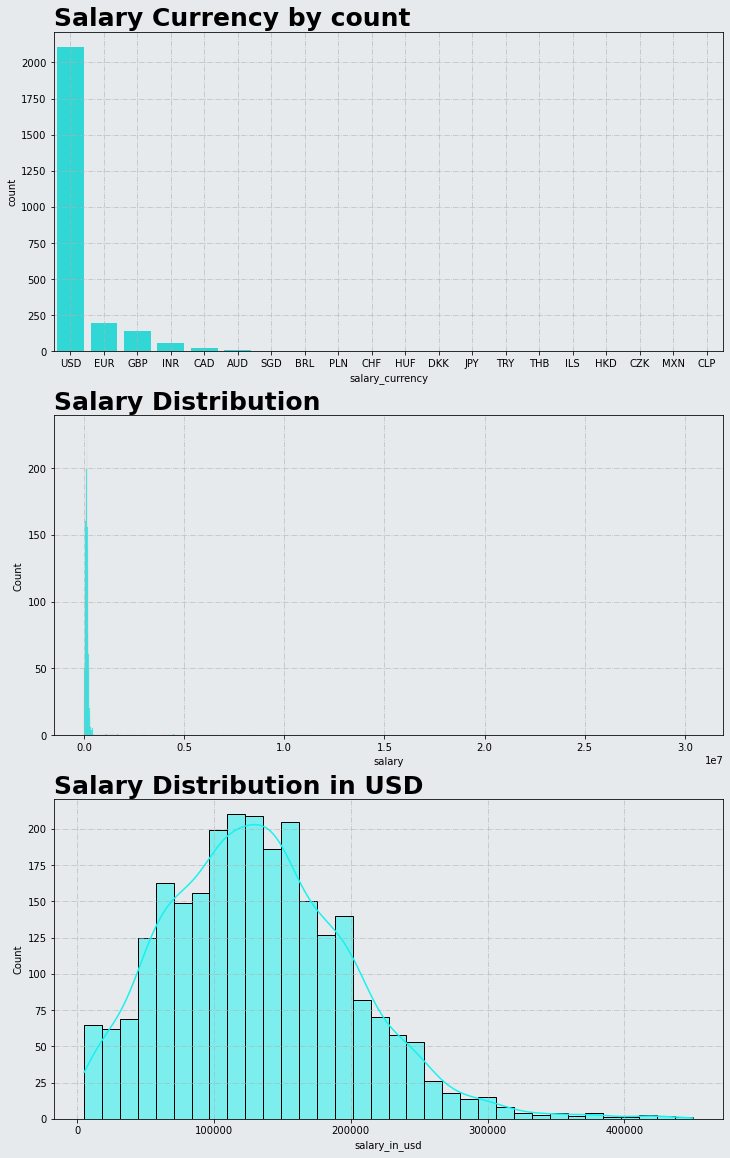

In [18]:
fig = plt.figure(figsize=(12, 20), facecolor=background)
gs = fig.add_gridspec(3,1)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[2,0])

for ax in fig.axes:
    ax.set_facecolor(background)

sns.countplot(x=ds_salary["salary_currency"], order=ds_salary["salary_currency"].value_counts().index,
             color="#14F3F0", ax=ax0)
sns.histplot(x=ds_salary["salary"], color="#14F3F0", ax=ax1)
sns.histplot(x=ds_salary["salary_in_usd"], kde=True,  color="#14F3F0", ax=ax2)

ax0.set_title("Salary Currency by count", size=25, weight="bold", loc="left")
ax1.set_title("Salary Distribution", size=25, weight="bold", loc="left")
ax2.set_title("Salary Distribution in USD", size=25, weight="bold", loc="left")

for ax in fig.axes:
    ax.grid(True, linestyle="-.", alpha=0.7)

### Employee Residence

In [19]:
print(ds_salary["employee_residence"].value_counts())

US    1893
GB     150
CA      81
IN      70
ES      47
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64


In [20]:
# create a geo map

### Remote Ratio

Text(0.0, 1.0, 'Remote Ratio')

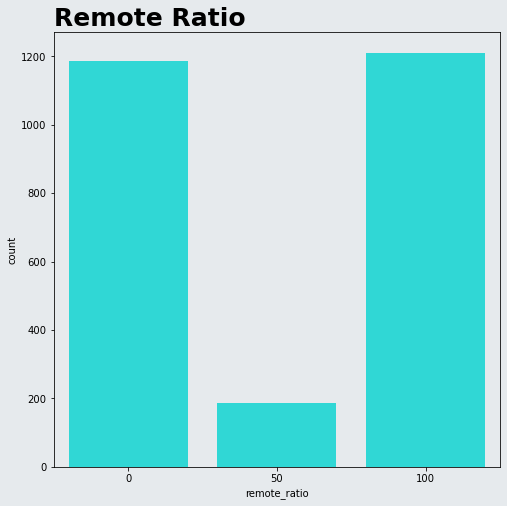

In [21]:
fig, ax= plt.subplots(1,1, figsize=(8,8), facecolor=background)
ax.set_facecolor(background)

sns.countplot(x=ds_salary["remote_ratio"], color="#14F3F0")

plt.title("Remote Ratio", loc="left", size=25, weight="bold")

### Company Location 

In [22]:
# create a geo map

### Company  Size 

Text(0.0, 1.0, 'Company Size')

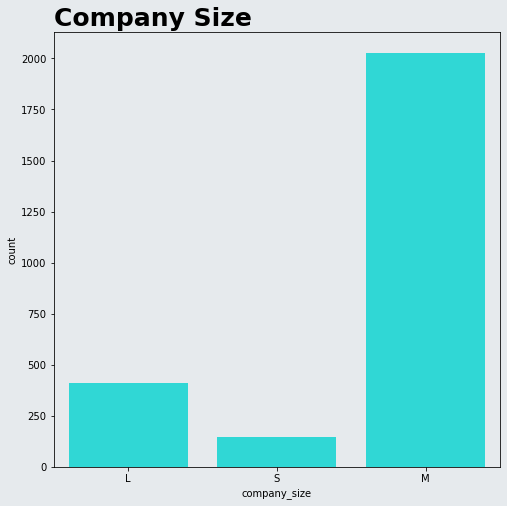

In [23]:
fig, ax= plt.subplots(1,1, figsize=(8,8), facecolor=background)
ax.set_facecolor(background)

sns.countplot(x=ds_salary["company_size"], color="#14F3F0")

plt.title("Company Size", loc="left", size=25, weight="bold")

## Build the Model

In [24]:
# copy the data
ds_salary_copy = ds_salary.copy()

In [25]:
# lets handle the categorical data first
ds_salary_copy["job_title"].value_counts()

Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: job_title, Length: 93, dtype: int64

In [26]:
def map_job_title(job_title):
    if job_title in ["Data Engineer", "Data Scientist", "Data Analyst", "Machine Learning Engineer"]:
        return job_title
    else:
        return "Other"

ds_salary_copy["new_job_title"] = ds_salary_copy["job_title"].apply(map_job_title)

In [27]:
# first one done
ds_salary_copy["new_job_title"].value_counts()

Other                        846
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Name: new_job_title, dtype: int64

In [28]:
# company location
ds_salary_copy["company_location"].value_counts()

US    1929
GB     155
CA      83
IN      57
DE      55
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [29]:
ds_salary_copy["company_location"] = np.where(ds_salary["company_location"] == "US", 1,0)
ds_salary_copy.rename(columns={"company_location" : "company_location_US"}, inplace=True)
ds_salary_copy["company_location_US"].value_counts()

1    1929
0     655
Name: company_location_US, dtype: int64

In [30]:
# employee residence
ds_salary_copy["employee_residence"].value_counts()

US    1893
GB     150
CA      81
IN      70
ES      47
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [31]:
ds_salary_copy["employee_residence"] = np.where(ds_salary["employee_residence"]=="US", 1,0)
ds_salary_copy.rename(columns={"employee_residence" : "employee_residence_US"}, inplace=True)
ds_salary_copy["employee_residence_US"].value_counts()

1    1893
0     691
Name: employee_residence_US, dtype: int64

In [32]:
# looks good, we will be using Salary in USD as our target variable, and everything else 
# (except job_title, salary and salary_currency) as our features

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [34]:
# create X
features = ["work_year", "experience_level", "employment_type", "employee_residence_US", "remote_ratio",
           "company_location_US", "company_size", "new_job_title"]
X = ds_salary_copy[features]
X.head()

,work_year,experience_level,employment_type,employee_residence_US,remote_ratio,company_location_US,company_size,new_job_title
0,2023,SE,FT,0,100,0,L,Other
1,2023,MI,CT,1,100,1,S,Other
2,2023,MI,CT,1,100,1,S,Other
3,2023,SE,FT,0,100,0,M,Data Scientist
4,2023,SE,FT,0,100,0,M,Data Scientist


In [35]:
# create y
y = ds_salary_copy.salary_in_usd

In [36]:
# split the data into train and validation
X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size=0.8, random_state=0)

In [37]:
# select categorical columns
categorical_cols = ds_salary_copy.select_dtypes(include=["object", "category"]).columns
categorical_cols = categorical_cols.drop(["salary_currency", "job_title"])
categorical_cols

Index(['experience_level', 'employment_type', 'company_size', 'new_job_title'], dtype='object')

In [38]:
# select numerical cols
numerical_cols = ds_salary_copy.select_dtypes(include=["float", "int"]).columns
numerical_cols = numerical_cols.drop(["salary", "salary_in_usd"])
numerical_cols

Index(['work_year', 'employee_residence_US', 'remote_ratio',
       'company_location_US'],
      dtype='object')

In [39]:
# preprocessing steps for numerical data
numerical_transformer = SimpleImputer(strategy="median")  

# prepoccesing steps for categorical data
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("hotencoder", OneHotEncoder(handle_unknown="ignore"))
])

# combine both
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)   
])

In [40]:
# define Model
model = RandomForestRegressor(n_estimators=50, random_state=0)

#### Random Forest Regression 

In [41]:
# build the pipeline
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor), 
    ("rf", model)
])

# fit the model
rf_pipeline.fit(X_train, y_train)

# get prediction
y_pred = rf_pipeline.predict(X_valid)

# mean absolute error
mae = mean_absolute_error(y_valid, y_pred)

print("MEA RandomForestRegressor: ", mae)

MEA RandomForestRegressor:  39606.29829835743


In [42]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# define parameters
rf_param_grid = {
    "rf__n_estimators" : [50,100,200],
    "rf__max_depth" : [None, 5, 10], 
    "rf__min_samples_split" : [2,5], 
    "rf__min_samples_leaf" : [1,2] 
}

# create Gridsearch object
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5)

# fit the Gridsearch object
rf_grid_search.fit(X_train, y_train)


print("Best parameters: ", rf_grid_search.best_params_)
print("Cross validation score", rf_grid_search.best_score_)

Best parameters:  {'rf__max_depth': 5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Cross validation score 0.3894017701816715


In [43]:
# get the score for the validation data
valid_score = rf_grid_search.score(X_valid, y_valid)

# print score
print("Validation Set Score: ", valid_score)

Validation Set Score:  0.4241343441444847


#### Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
 
# define model
lr = LinearRegression()

In [45]:
# build the pipeline
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor), 
    ("lr", lr)    
])

In [46]:
lr_param_grid = {
    "lr__normalize": [True, False],
    "lr__fit_intercept": [True, False]
}

#create Gridsearch object
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5)

# Fit the new GridSearchCV object on the training data
lr_grid_search.fit(X_train, y_train)

# Print the best parameters and the validation set score
print("Best parameters: ", lr_grid_search.best_params_)
print("Crossvalidation score: ", lr_grid_search.best_score_)

Best parameters:  {'lr__fit_intercept': True, 'lr__normalize': True}
Crossvalidation score:  0.38784865265406904


In [47]:
# get the score for the validaton data
lr_valid_score = lr_grid_search.score(X_valid, y_valid)

# print score
print("Validaton Set Score: ", lr_valid_score)

Validaton Set Score:  0.42444004793421786


##### 
I'm a bit disappointed with the performance of my models. The validation set score is not very high, and I'm not sure why. I've tried a few different models and tuned their hyperparameters, but the results are still not great. I would appreciate any tips or help in figuring out how to improve my models.